Importing necessary libraries for Data Loading & SVM modeling for Multi-class classification on Fashion-MNIST Dataset

Packages Used:-
* matplotlib - for plotting and visualization
* keras - for loading Fashion-MNIST dataset
* sklearn - for features normalization, Grid Search for Hyper-parameters, SVM classifier, Evaluation Metrics
* numpy - for array operations
* pickle - for saving/loading learned SVM model

In [49]:
## Author - Lilly Kumari
import os, sys, time
import keras
import numpy as np
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm, model_selection
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# change accordingly on your machine
BASE_PATH = '/home/lilly/Pictures/ai_project/'
if not os.path.exists(BASE_PATH):
    os.makedirs(BASE_PATH)

In [9]:
## Loading the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

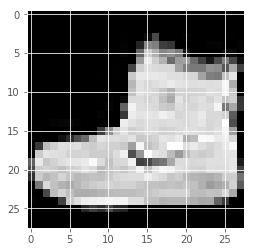

In [10]:
imgs = plt.imshow(x_train[0], cmap='gray')

Reshaping the loaded train & test datasets and converting datatype to float

In [11]:
x_train = x_train.reshape(y_train.shape[0], 784)
x_test = x_test.reshape(y_test.shape[0], 784)
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [12]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)
print ("No of provided training examples = ", x_train.shape[0])
print ("No of provided test examples = ", x_test.shape[0])
print ("Overall number of classes/categories in the dataset = ", len(np.unique(y_train)))

(60000, 784) (60000,)
(10000, 784) (10000,)
No of provided training examples =  60000
No of provided test examples =  10000
Overall number of classes/categories in the dataset =  10


Creating a validation subset for hyper-parameter tuning. For that, we sample randomly 10000 data points from the provided training dataset

In [ ]:
n = 10000
index = np.random.choice(x_train.shape[0], n, replace=False)  
x_subset = x_train[index]
y_subset = y_train[index]

# print (np.unique(y_subset))
# print (np.histogram(y_subset))

pickle.dump(index, open(BASE_PATH + "val_indices", "wb"))

Normalizing the train, validation & test dataset

In [13]:
val_indices = pickle.load(open(BASE_PATH + "val_indices", "rb"))
print (val_indices)

ss = StandardScaler()
x_train_norm = ss.fit_transform(x_train)
x_test_norm = ss.fit_transform(x_test)

indices = [x for x in range(60000)]
train_indices = [i for i in indices if i not in val_indices]

x_tr = x_train_norm[train_indices]
x_val = x_train_norm[val_indices]
y_tr = y_train[train_indices]
y_val = y_train[val_indices]

[ 2152 23381 54801 ... 36605 32319 32212]


Hyper-parameter tuning suing GridSearch for C (penalty term for error of SVM) and Gamma (kernel coefficient)

In [18]:
svm_model = svm.SVC(verbose=True, kernel='poly')
parameters = {'C':(1,10),'gamma': (0.1,0.01)}

grid_result = GridSearchCV(svm_model, parameters, verbose=4)
grid_result.fit(x_val, y_val)

print ("Best parameters found")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/lilly/anaconda3/envs/ai_project/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=1, gamma=0.1 ..................................................
[LibSVM][CV] ......... C=1, gamma=0.1, score=0.8612110311750599, total=  52.5s
[CV] C=1, gamma=0.1 ..................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] ......... C=1, gamma=0.1, score=0.8658865886588659, total=  53.2s
[CV] C=1, gamma=0.1 ..................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s


[CV] ......... C=1, gamma=0.1, score=0.8504953467427199, total=  52.0s
[CV] C=1, gamma=0.01 .................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.7min remaining:    0.0s


[CV] ........ C=1, gamma=0.01, score=0.8612110311750599, total=  52.1s
[CV] C=1, gamma=0.01 .................................................
[LibSVM][CV] ........ C=1, gamma=0.01, score=0.8658865886588659, total=  53.2s
[CV] C=1, gamma=0.01 .................................................
[LibSVM][CV] ........ C=1, gamma=0.01, score=0.8504953467427199, total=  51.9s
[CV] C=10, gamma=0.1 .................................................
[LibSVM][CV] ........ C=10, gamma=0.1, score=0.8612110311750599, total=  52.1s
[CV] C=10, gamma=0.1 .................................................
[LibSVM][CV] ........ C=10, gamma=0.1, score=0.8658865886588659, total=  53.2s
[CV] C=10, gamma=0.1 .................................................
[LibSVM][CV] ........ C=10, gamma=0.1, score=0.8504953467427199, total=  51.9s
[CV] C=10, gamma=0.01 ................................................
[LibSVM][CV] ....... C=10, gamma=0.01, score=0.8612110311750599, total=  52.1s
[CV] C=10, gamma=0.01 .......

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 18.7min finished


Best parameters found
Best: 0.859200 using {'C': 1, 'gamma': 0.1}
0.859200 (0.006441) with: {'C': 1, 'gamma': 0.1}
0.859200 (0.006441) with: {'C': 1, 'gamma': 0.01}
0.859200 (0.006441) with: {'C': 10, 'gamma': 0.1}
0.859200 (0.006441) with: {'C': 10, 'gamma': 0.01}


Hyper-parameter tuning suing GridSearch for C (penalty term for error of SVM), Gamma (kernel coefficient) and Degree (degree of the polynomial kernel function used for transforming the data) ---> since the above method returned same validation accuracy for all 4 possible combinations

In [20]:
svm_model = svm.SVC(verbose=True, kernel='poly')
parameters = {'C':(1,10),'gamma': (0.1,0.01), 'degree': (3,4,5)}

grid_result = GridSearchCV(svm_model, parameters, verbose=4)
grid_result.fit(x_val, y_val)

print ("Best parameters found")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/home/lilly/anaconda3/envs/ai_project/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=1, degree=3, gamma=0.1 ........................................
[LibSVM][CV]  C=1, degree=3, gamma=0.1, score=0.8612110311750599, total=  52.0s
[CV] C=1, degree=3, gamma=0.1 ........................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV]  C=1, degree=3, gamma=0.1, score=0.8658865886588659, total=  53.1s
[CV] C=1, degree=3, gamma=0.1 ........................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s


[CV]  C=1, degree=3, gamma=0.1, score=0.8504953467427199, total=  51.8s
[CV] C=1, degree=3, gamma=0.01 .......................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.7min remaining:    0.0s


[CV]  C=1, degree=3, gamma=0.01, score=0.8612110311750599, total=  52.0s
[CV] C=1, degree=3, gamma=0.01 .......................................
[LibSVM][CV]  C=1, degree=3, gamma=0.01, score=0.8658865886588659, total=  53.0s
[CV] C=1, degree=3, gamma=0.01 .......................................
[LibSVM][CV]  C=1, degree=3, gamma=0.01, score=0.8504953467427199, total=  51.9s
[CV] C=1, degree=4, gamma=0.1 ........................................
[LibSVM][CV]  C=1, degree=4, gamma=0.1, score=0.8408273381294964, total= 1.1min
[CV] C=1, degree=4, gamma=0.1 ........................................
[LibSVM][CV]  C=1, degree=4, gamma=0.1, score=0.8595859585958596, total= 1.1min
[CV] C=1, degree=4, gamma=0.1 ........................................
[LibSVM][CV]  C=1, degree=4, gamma=0.1, score=0.8369858901230861, total= 1.1min
[CV] C=1, degree=4, gamma=0.01 .......................................
[LibSVM][CV]  C=1, degree=4, gamma=0.01, score=0.8408273381294964, total= 1.1min
[CV] C=1, degree=4

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 61.9min finished


Best parameters found
Best: 0.859200 using {'C': 1, 'degree': 3, 'gamma': 0.1}
0.859200 (0.006441) with: {'C': 1, 'degree': 3, 'gamma': 0.1}
0.859200 (0.006441) with: {'C': 1, 'degree': 3, 'gamma': 0.01}
0.845800 (0.009873) with: {'C': 1, 'degree': 4, 'gamma': 0.1}
0.845800 (0.009873) with: {'C': 1, 'degree': 4, 'gamma': 0.01}
0.838200 (0.008719) with: {'C': 1, 'degree': 5, 'gamma': 0.1}
0.838200 (0.008719) with: {'C': 1, 'degree': 5, 'gamma': 0.01}
0.859200 (0.006441) with: {'C': 10, 'degree': 3, 'gamma': 0.1}
0.859200 (0.006441) with: {'C': 10, 'degree': 3, 'gamma': 0.01}
0.845800 (0.009873) with: {'C': 10, 'degree': 4, 'gamma': 0.1}
0.845800 (0.009873) with: {'C': 10, 'degree': 4, 'gamma': 0.01}
0.838200 (0.008719) with: {'C': 10, 'degree': 5, 'gamma': 0.1}
0.838200 (0.008719) with: {'C': 10, 'degree': 5, 'gamma': 0.01}


Finally learning a SVM by fitting on the training dataset (of 50k images) using the hyper-parameters chosen via GridSearch

In [0]:
svm_clf = svm.SVC(gamma=0.1, C=1, kernel='poly', degree=3, verbose=True)
svm_clf.fit(x_tr, y_tr)

[LibSVM]

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=True)

In [0]:
acc = svm_clf.score(x_test_norm,y_test)
print('Accuracy of SVM Classifier on test dataset = ', acc)

Accuracy of SVM Classifier on test dataset =  0.8894


In [0]:
## Saving the SVM classifier for future use
pickle.dump(svm_clf, open(BASE_PATH + "best_svm", "wb"))

In [15]:
# Getting the prediction on the test dataset using the learned SVM classifier
y_pred = svm_clf.predict(x_test_norm)

Plotting a heat map for the confusion matrix calculated over the test labels & predicted labels

<Figure size 432x288 with 0 Axes>

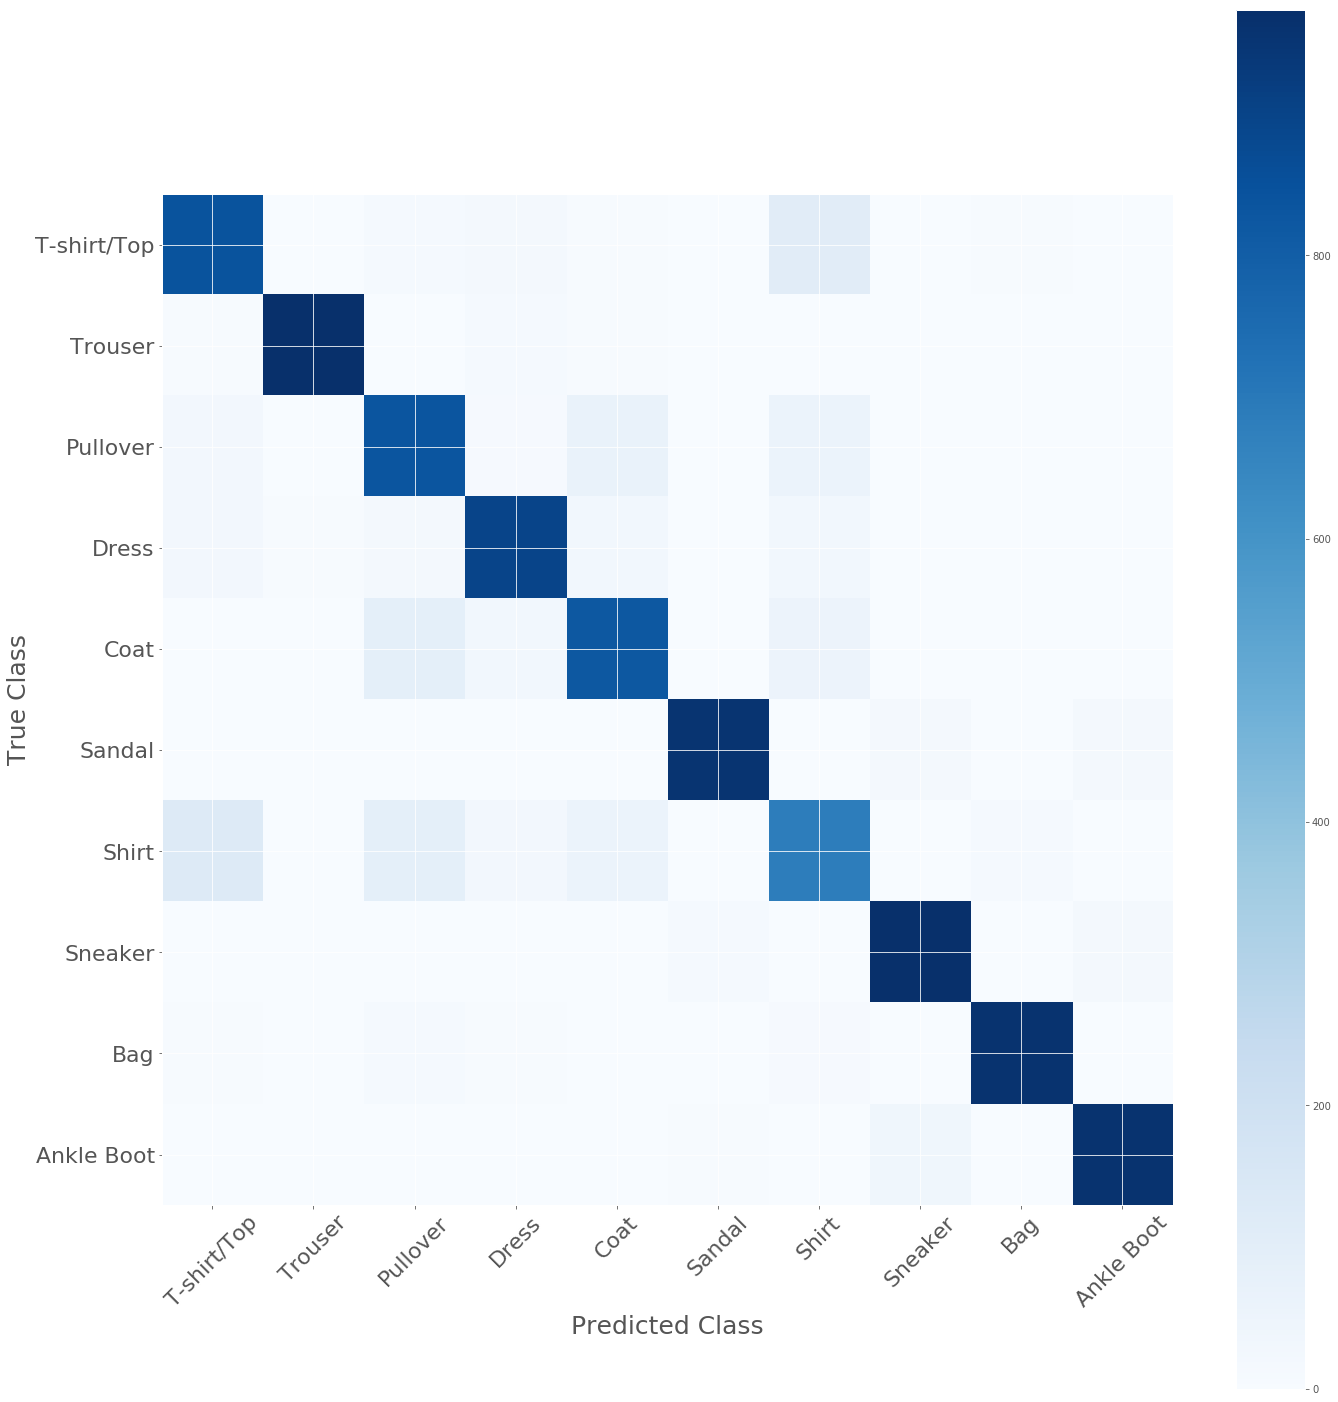

In [40]:
labels = ['T-shirt/Top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

def plot_confusion_matrix(cm, labels, cmap=plt.cm.Blues):
    plt.figure(figsize=(20,20))
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    ticks = np.arange(len(labels))
    plt.xticks(ticks, labels, rotation=45)
    plt.yticks(ticks, labels)
    plt.ylabel('True Class', size=25)
    plt.xlabel('Predicted Class', size=25)
    plt.tight_layout()

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, labels)
plt.show()

Getting the classification report which includes micro level precision, recall & F1 score evaluation on test data

In [29]:
print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

 T-shirt/Top       0.82      0.84      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.78      0.83      0.81      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.83      0.82      0.83      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.72      0.68      0.70      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.97      0.96      0.97      1000
  Ankle Boot       0.97      0.96      0.96      1000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Plotting a grid of test images with their actual & predicted labels for visualizations

[0 1 2 3 4 5 6 7 8]


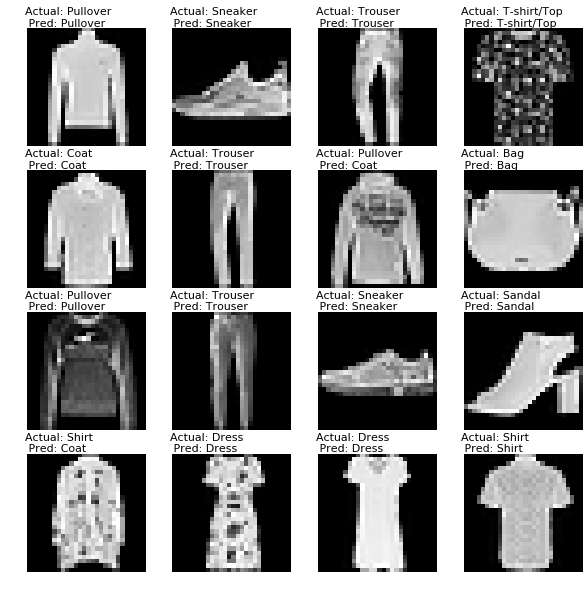

In [48]:
index = np.random.choice(x_test_norm.shape[0], 16, replace=False)
print (np.unique(y_test[index]))

def plot_predictions(images, predictions, gt):
    n = images.shape[0]
    num_row = int(np.ceil(n / 4))
    rows, axes = plt.subplots(num_row, 4)
    for i in range(num_row * 4):
        x = i % 4
        y = i // 4
        axes[x, y].axis('off')
        label = labels[int(predictions[i])]
        actual = labels[gt[i]]
        axes[x, y].imshow(images[i].reshape(28,28), cmap='gray')
        axes[x, y].text(-1, -1, "Actual: " + actual + '\n Pred: %s' % label, fontsize=11)
        plt.gcf().set_size_inches(10, 10)  

plot_predictions(np.squeeze(x_test[index]), y_pred[index], y_test[index])